<a href="https://colab.research.google.com/github/ZiadMAlsawy/ML_Project/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Youssef Tasks**



---


1.   **Over All Preprocessing Again / Outliers Specfically**
2.   **Exploration Phase**
3.   **Over Sampling Technique**
4.   **Try your oversampling technique on the classfier**   



# **Modules Import & Intiation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate


from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids , TomekLinks , NearMiss

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression

plt.style.use("fivethirtyeight")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# **OSEMN Framework will Help us deal with our task**
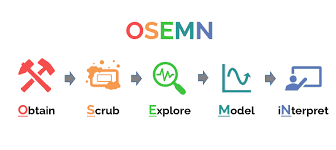

## **Obtain the Data Set**

In [ ]:
creditCard = pd.read_csv('/content/drive/MyDrive/CSAI 253 Data Sets/creditcard.csv')

In [ ]:
creditCard.shape

In [ ]:
creditCard.head()

In [ ]:
creditCard.info()

In [ ]:
creditCard.describe()

In [ ]:
creditCard.sample(10)

## **Scrubbing the Data Set from**


1.   Missing Records
2.   Duplicates
3. Outliers



**Missing Values Handler**

In [ ]:
creditCard.isnull().sum()

In [ ]:
missing = creditCard.isnull().sum()
missing = missing[missing > 0]/creditCard.shape[0]
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# We can conclude now that there is not any missing values in any column

**Duplicate Records Handler**

In [ ]:
print(f"{creditCard.duplicated().sum() / creditCard.shape[0] * 100 :.2f}  % of the data is duplicated The Decision will be Drop out those duplicated records")
creditCard.drop_duplicates(inplace=True)

In [ ]:
creditCard[creditCard.duplicated()]

**Outliers Handler**

**Summarize All Data Set Features using Box Plot**

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(creditCard.columns[:30]):
    sns.boxplot(data=creditCard, y=column, ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(creditCard.columns[:31]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
Outliers_Frequence = {}
for i in creditCard.columns:
  Outliers_Frequence[i] = creditCard[creditCard[i] > (creditCard[i].mean() + 3 * creditCard[i].std())].shape[0]

Outliers_Frequence

In [ ]:
# You Can Apply The Outliers Handling Here

## **Exploring the Data Set Using Visualization Modules**

In [ ]:
# You Can Apply The Data Exploration Phase Here

# **Resolving the Imbalanced Features**

####**I want only to showcase the influence of neglecting this problem**

In [ ]:
X = creditCard.drop('Class', axis=1)
y = creditCard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
y_test.value_counts()

####**Under Sampling the Imbalanced Feature**


*  https://imbalanced-learn.org/stable/
*  https://scikit-learn.org/1.5/modules/generated/sklearn.utils.resample.html#sklearn.utils.resample

| Technique                   | Status | Assigned to   |
|-----------------------------|--------|-------------- |
| Random Under Sampling (RUS) |    ✅  | Adham        |
| Cluster Centriods           |    ✅  | Adham        |             
| Tomek Links                 |    ✅  | Adham        |  
| NearMiss                    |    ✅  | Adham        |  


#####**Random Under Sampling**

In [ ]:
majority_class = creditCard[creditCard['Class'] == 0]
minority_class = creditCard[creditCard['Class'] == 1]

majority_random_down_sampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

random_under_sampled_df = pd.concat([majority_random_down_sampled, minority_class]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X_rand_Under_Sampling = random_under_sampled_df.drop('Class', axis=1)
y_rand_Under_Sampling = random_under_sampled_df['Class']
X_train_random_under_samples, X_test_random_under_samples, y_train_random_under_samples, y_test_random_under_samples = train_test_split(X_rand_Under_Sampling, y_rand_Under_Sampling, test_size=0.33, random_state=42)

#####**Cluster Centroids**



In [ ]:
cc = ClusterCentroids(random_state=42)
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train, y_train)

##### **TomekLinks**

In [ ]:
tomek = TomekLinks()
X_resampled_tl, y_resampled_tl = tomek.fit_resample(X_train, y_train)

##### **Near Miss**

In [ ]:
nm = NearMiss(version=1)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_resampled_nm, y_resampled_nm, test_size=0.2, random_state=42)

####**Over Sampling the Imbalanced Feature usinge Smote Technique**




In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled_SM, y_train_resampled_SM = smote.fit_resample(X_train, y_train)

####**Smote + Heavy Penalty for minority class**


In [ ]:
model_2 = LogisticRegression( C=0.1, class_weight={0: 1, 1: 12} , random_state=42)
model_2.fit(X_train_resampled, y_train_resampled)


# **Predict The Fraud Transitions Cross The Different Models**

###**KNN Classfier**

In [ ]:
# accuracy_score_K = []
# precision_score_K = []
# recall_score_K = []
# f1_score_K = []
# auc_score_K = []

# KNN_Imbalnced_Results = pd.DataFrame({
#     'K Value' : range(1,15),
#     'Accuracy Score' : accuracy_score_K,
#     'Precision Score' : precision_score_K,
#     'Recall Score' : recall_score_K,
#     'F1 Score' : f1_score_K,
#     'AUC Curve' : auc_score_K,
#     'Imbalnced Feature Statue' : True,
# })

**Without Imbalancing**

In [ ]:
# for k in range(1,15):
#   knn = KNeighborsClassifier(n_neighbors=k)
#   knn.fit(X_train,y_train)
#   y_pred = knn.predict(X_test)
#   y_probs_knn = knn.predict_proba(X_test)[:, 1]

#   accuracy_score_K.append(accuracy_score(y_test, y_pred))
#   precision_score_K.append(precision_score(y_test, y_pred))
#   recall_score_K.append(recall_score(y_test, y_pred))
#   f1_score_K.append(f1_score(y_test, y_pred))
#   auc_score_K.append(roc_auc_score(y_test, y_probs_knn))

In [ ]:
# fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

#### **Insights**

**Accuracy Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Accuracy Score", data=KNN_Imbalnced_Results)

**Precision Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Precision Score", data=KNN_Imbalnced_Results)

**Recall Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Recall Score", data=KNN_Imbalnced_Results)

**F1 Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="F1 Score", data=KNN_Imbalnced_Results)

###**Logistic Regression**

In [ ]:
Logistic_Regression_Records = pd.DataFrame(columns = ['Model Name' , 'Accuracy Score' , 'Precision Score' , 'Recall Score' ,'F1 Score' ,'AUC Score' , 'ROC Curve', 'Confusion Matrix' , 'Imbalnced Feature Statue' , 'Technique' ])

**Without Imbalancing**

In [ ]:
Logistic_Regresion_Model_Before_Imbalance = LogisticRegression(max_iter = 5000)
Logistic_Regresion_Model_Before_Imbalance.fit(X_train, y_train)
y_pred_LR_Before_Imbalance = Logistic_Regresion_Model_Before_Imbalance.predict(X_test)
y_pred_proba = Logistic_Regresion_Model_Before_Imbalance.predict_proba(X_test)[:, 1]


LR_Imbalanced = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_pred_LR_Before_Imbalance),
    'Precision Score': precision_score(y_test, y_pred_LR_Before_Imbalance),
    'Recall Score': recall_score(y_test, y_pred_LR_Before_Imbalance),
    'F1 Score': f1_score(y_test, y_pred_LR_Before_Imbalance),
    'AUC Score': roc_auc_score(y_test, y_pred_proba),
    'ROC Curve': roc_curve(y_test, y_pred_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_LR_Before_Imbalance),
    'Imbalnced Feature Statue': True,
    'Technique': "Imbalanced Features"
}

Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_Imbalanced])], ignore_index=True)

In [ ]:
Logistic_Regression_Records

**Random Under Sampling**

In [ ]:
Logistic_Regresion_Model_After_RUS = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_RUS.fit(X_train_random_under_samples, y_train_random_under_samples)
y_random_under_sampled_pred = Logistic_Regresion_Model_After_RUS.predict(X_test_random_under_samples)
y_pred_proba_RUS = Logistic_Regresion_Model_After_RUS.predict_proba(X_test_random_under_samples)[:, 1]

LR_RUS = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'Precision Score': precision_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'Recall Score': recall_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'F1 Score': f1_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'AUC Score': roc_auc_score(y_test_random_under_samples, y_pred_proba_RUS),
    'ROC Curve': roc_curve(y_test_random_under_samples, y_pred_proba_RUS),
    'Confusion Matrix': confusion_matrix(y_test_random_under_samples, y_random_under_sampled_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Random Under Sampling'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_RUS])], ignore_index=True)

**Cluster Centroids**

In [ ]:
Logistic_Regresion_Model_After_CC = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_CC.fit(X_resampled_cc, y_resampled_cc)
y_cc_pred = Logistic_Regresion_Model_After_CC.predict(X_test)
y_pred_proba_cc = Logistic_Regresion_Model_After_CC.predict_proba(X_test)[:, 1]

LR_CC = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_cc_pred),
    'Precision Score': precision_score(y_test, y_cc_pred),
    'Recall Score': recall_score(y_test, y_cc_pred),
    'F1 Score': f1_score(y_test, y_cc_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_cc),
    'ROC Curve': roc_curve(y_test, y_pred_proba_cc),
    'Confusion Matrix': confusion_matrix(y_test, y_cc_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Cluster Centroids'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_CC])], ignore_index=True)

**Tomek Links**

In [ ]:
Logistic_Regresion_Model_After_TL = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_TL.fit(X_resampled_tl, y_resampled_tl)
y_tl_pred = Logistic_Regresion_Model_After_TL.predict(X_test)
y_pred_proba_tl = Logistic_Regresion_Model_After_TL.predict_proba(X_test)[:, 1]

LR_TL = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_tl_pred),
    'Precision Score': precision_score(y_test, y_tl_pred),
    'Recall Score': recall_score(y_test, y_tl_pred),
    'F1 Score': f1_score(y_test, y_tl_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_tl),
    'ROC Curve': roc_curve(y_test, y_pred_proba_tl),
    'Confusion Matrix': confusion_matrix(y_test, y_tl_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Tomek Links'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_TL])], ignore_index=True)

**Near Miss**

In [ ]:
Logistic_Regresion_Model_After_NM = LogisticRegression(max_iter=10000)
Logistic_Regresion_Model_After_NM.fit(X_train_nm, y_train_nm)
y_nm_pred = Logistic_Regresion_Model_After_NM.predict(X_test_nm)
y_pred_proba_nm = Logistic_Regresion_Model_After_NM.predict_proba(X_test_nm)[:, 1]

LR_NM = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test_nm, y_nm_pred),
    'Precision Score': precision_score(y_test_nm, y_nm_pred),
    'Recall Score': recall_score(y_test_nm, y_nm_pred),
    'F1 Score': f1_score(y_test_nm, y_nm_pred),
    'AUC Score': roc_auc_score(y_test_nm, y_pred_proba_nm),
    'ROC Curve': roc_curve(y_test_nm, y_pred_proba_nm),
    'Confusion Matrix': confusion_matrix(y_test_nm, y_nm_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Near Miss'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_NM])], ignore_index=True)

####**Logestic Regression With Smote**


In [ ]:
model = LogisticRegression( random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_SM = model.predict(X_test)

In [ ]:
model_2 = LogisticRegression( C=0.1, class_weight={0: 1, 1: 12} , random_state=42)
model_2.fit(X_train_resampled_SM, y_train_resampled_SM)

y_pred_SM2 = model.predict(X_test)


#### **Insights**

**Comparing Out Prefromance Measures Across Under Sampling Techniques**

In [ ]:
sorted_by_F1_Score = Logistic_Regression_Records.sort_values(by="F1 Score", ascending=False)
sorted_by_F1_Score
# We can say that based on sorting by F1 Score Near Miss is the Best One

In [ ]:
sorted_data = sorted_by_F1_Score.sort_values(by="F1 Score", ascending=False)
fig, axes = plt.subplots(5, 1, figsize=(10,8))

title_fontsize = 12
label_fontsize = 10
tick_fontsize = 8

sns.barplot(data=sorted_data, y="Technique", x="Accuracy Score", ax=axes[0], orient='h')
axes[0].set_title("Accuracy Score by Technique", fontsize=title_fontsize)
axes[0].set_xlabel("Accuracy Score", fontsize=label_fontsize)
axes[0].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[0].patches:
    axes[0].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="Precision Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="Precision Score", ax=axes[1], orient='h')
axes[1].set_title("Precision Score by Technique", fontsize=title_fontsize)
axes[1].set_xlabel("Precision Score", fontsize=label_fontsize)
axes[1].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[1].patches:
    axes[1].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="Recall Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="Recall Score", ax=axes[2], orient='h')
axes[2].set_title("Recall Score by Technique", fontsize=title_fontsize)
axes[2].set_xlabel("Recall Score", fontsize=label_fontsize)
axes[2].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[2].patches:
    axes[2].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="F1 Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="F1 Score", ax=axes[3], orient='h')
axes[3].set_title("F1 Score by Technique", fontsize=title_fontsize)
axes[3].set_xlabel("F1 Score", fontsize=label_fontsize)
axes[3].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[3].patches:
    axes[3].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="AUC Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="AUC Score", ax=axes[4], orient='h')
axes[4].set_title("AUC Score by Technique", fontsize=title_fontsize)
axes[4].set_xlabel("AUC Score", fontsize=label_fontsize)
axes[4].set_xlabel("AUC Score", fontsize=label_fontsize)
axes[4].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[4].patches:
    axes[4].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

plt.tight_layout()

plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test)
precision = precision_score(y_test, y_pred)

print(f"{'Metric'} | {'Value'}")
print("-" * 25)
print(f"{'Accuracy'} | {accuracy}")
print(f"{'F1 Score'} | {f1}")
print(f"{'Recall'} | {recall}")
print(f"{'Precision'} | {precision}")

**AUC - ROC Curve Under Different UnderSampling Techniques**

In [ ]:
num_models = Logistic_Regression_Records.shape[0]

fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 6))
fig.suptitle("ROC Under Different UnderSampling Techniques")

for i in range(num_models):
    fpr, tpr, thresholds = Logistic_Regression_Records['ROC Curve'].iloc[i]
    ax = axes[i] if num_models > 1 else axes
    roc_auc = auc(fpr, tpr)
    technique_name = Logistic_Regression_Records["Technique"].iloc[i]
    ax.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    ax.set_title(technique_name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**Cunfusion Matrix Under Different UnderSampling Techniques**

In [ ]:
fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))
fig.suptitle("Confusion Matrix Under Different UnderSampling Techniques")

for i in range(num_models):
    technique_name = Logistic_Regression_Records["Technique"].iloc[i]
    confusion_matrix_data = Logistic_Regression_Records["Confusion Matrix"].iloc[i]
    ax = axes[i] if num_models > 1 else axes

    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    sns.set(font_scale=1.5)
    ax.set_title(technique_name)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

***The Conclusion that while Over Sampling (Near MIss) is the Best Technqiue With Best Preformance Measures ~> Let's Apply Regualrization Techniques***

#### **Lasso Regularization Technique on Logistic Regression**
*Near Miss Undersampling for Imbalanced Features*

In [ ]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=10000)
lasso_model.fit(X_train_nm, y_train_nm)
lasso_preds = lasso_model.predict(X_test_nm)
lasso_preds_proba = lasso_model.predict_proba(X_test_nm)[:, 1]

lasso_results = {
    "Accuracy": accuracy_score(y_test_nm, lasso_preds),
    "Precision": precision_score(y_test_nm, lasso_preds),
    "Recall": recall_score(y_test_nm, lasso_preds),
    "F1 Score": f1_score(y_test_nm, lasso_preds),
    "AUC Score": roc_auc_score(y_test_nm, lasso_preds_proba),
    "ROC Curve": roc_curve(y_test_nm, lasso_preds_proba),
    "Confusion Matrix": confusion_matrix(y_test_nm, lasso_preds)
}

#### **Ridge Regularization Technique on Logistic Regression**
*Near Miss Undersampling for Imbalanced Features*

In [ ]:
ridge_model = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
ridge_model.fit(X_train_nm, y_train_nm)
ridge_preds = ridge_model.predict(X_test_nm)
ridge_preds_proba = ridge_model.predict_proba(X_test_nm)[:, 1]

ridge_results = {
    "Accuracy": accuracy_score(y_test_nm, ridge_preds),
    "Precision": precision_score(y_test_nm, ridge_preds),
    "Recall": recall_score(y_test_nm, ridge_preds),
    "F1 Score": f1_score(y_test_nm, ridge_preds),
    "AUC Score": roc_auc_score(y_test_nm, ridge_preds_proba),
    "ROC Curve": roc_curve(y_test_nm, ridge_preds_proba),
    "Confusion Matrix": confusion_matrix(y_test_nm, ridge_preds)
}


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fpr_lasso, tpr_lasso, _ = lasso_results['ROC Curve']
roc_auc_lasso = lasso_results['AUC Score']
axes[0].plot(fpr_lasso, tpr_lasso, color='blue', lw=2, label=f'Lasso (AUC = {roc_auc_lasso:.2f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Lasso ROC Curve')
axes[0].legend(loc='lower right')
axes[0].grid()

fpr_ridge, tpr_ridge, _ = ridge_results['ROC Curve']
roc_auc_ridge = ridge_results['AUC Score']
axes[1].plot(fpr_ridge, tpr_ridge, color='red', lw=2, label=f'Ridge (AUC = {roc_auc_ridge:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Ridge ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(lasso_results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Lasso Confusion Matrix')

sns.heatmap(ridge_results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Ridge Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
ridge_results_for_table = ridge_results.copy()
del ridge_results_for_table["ROC Curve"]
del ridge_results_for_table["Confusion Matrix"]

print("Ridge Logistic Regression Results:")
print(tabulate.tabulate(ridge_results_for_table.items(), headers=["Metric", "Value"], tablefmt="grid"))


In [ ]:
lasso_results_for_table = lasso_results.copy()
del lasso_results_for_table["ROC Curve"]
del lasso_results_for_table["Confusion Matrix"]

print("nLasso Logistic Regression Results:")
print(tabulate.tabulate(lasso_results_for_table.items(), headers=["Metric", "Value"], tablefmt="grid"))

# **There is No Effect on Prefromance metrics after applying *Regularization* techniques into Logistic Regression Classfier after Dealing with Imbalanced Featrues Using Near Miss Under Sampling Technique**

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title('Class Distribution in Resampled Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'], rotation=0)
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(X_train_resampled['Amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Amount After SMOTE')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(X_train_resampled['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time After SMOTE')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(15, 10))
sns.heatmap(X_train_resampled.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Features After SMOTE')
plt.show()


